# Исследование объявлений о продаже квартир

- Будем исследовать данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
- Задача — выполнить предобработку данных и изучить их, чтобы найти важные особенности и зависимости, которые существуют на рынке недвижимости. Необходимо определить каким образом формируется рыночная стоимость объектов недвижимости
- О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

### Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

# Цель исследования:

Проанализировать данные Яндекс.Недвижимости, выявить существующие ошибки, установить основные параметры и их взамосвязи, определить ключевые факторы, влияющие на рыночную стоимость квартиры

# Ход исследования:

1. Общий обзор данных: выгрузка, рассмотрение столбцов
2. Предобработка данных: проверка данных на ошибки и оценка их влияния на исследование. Исправление самые критичных ошибок данных.
3. Проверка взимосвязей данных, определение ключевых факторов влияющих на стоимость квартиры

### Загрузка данных 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

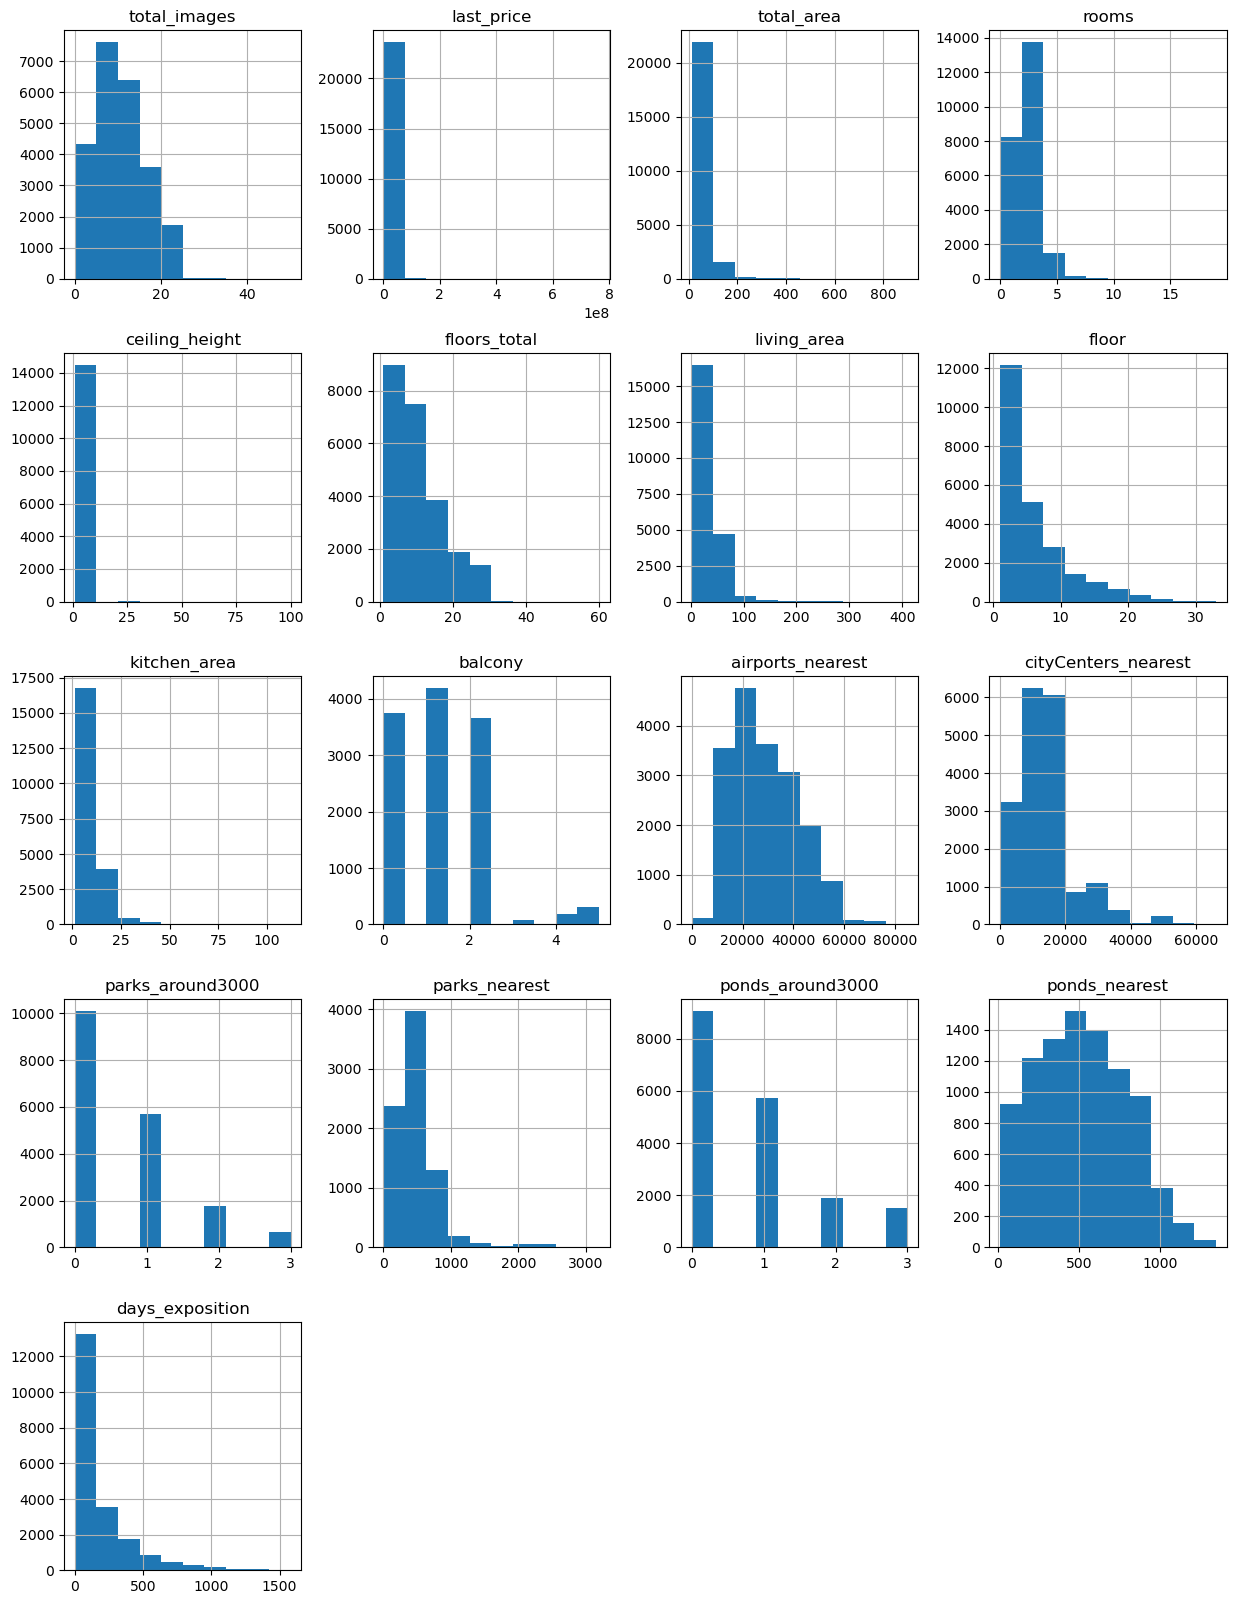

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv ('C:/Users/kaz-106/YandexDisk/Py-projects/02_Practicum projects/03_Data_research_analysis/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv ('/datasets/real_estate_data.csv', sep='\t')   
display(data.head())
print(data.info())
data.hist(figsize=(15, 20))
plt.show()


### Предобработка данных

#### Проверим в каких столбцах есть пропуски и сколько

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


#### Много пропусков в стоблце ceiling_height - скорее всего пользователи забыли/не стали указывать этот параметр. Пропущено очень много значений - 9195, 40% выборки, пропуски нужно заменить
    - Проверим характерные значение ceiling_height
    - Есть странные значения: 25, 32, 24 и т.д. - очевидно имеется в виду 2.5, 3.2, 2.4. Заменим такие значения
    - Заменим пропущенные значения NaN на median
    - Снова проверим наличие пропусков в ceiling_height

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
2.77149889685604


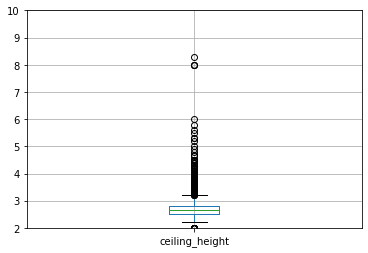

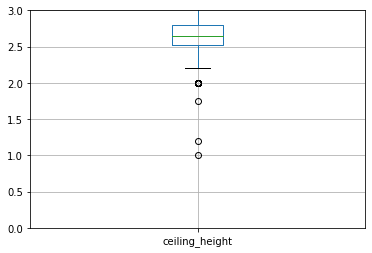

In [4]:
print(data['ceiling_height'].describe())
print(data['ceiling_height'].mean())

data.boxplot(column=['ceiling_height'])
plt.ylim(2, 10)
plt.show()
data.boxplot(column=['ceiling_height'])
plt.ylim(0, 3)
plt.show()

In [5]:
data.loc[data['ceiling_height'] >= 6, 'ceiling_height']=data.loc[data['ceiling_height'] >= 6, 'ceiling_height']/10

ceiling_height_median=data['ceiling_height'].median()

data.loc[data['ceiling_height']>=6,'ceiling_height']=ceiling_height_median
data.loc[data['ceiling_height']<=2,'ceiling_height']=ceiling_height_median

data['ceiling_height']=data['ceiling_height'].fillna(ceiling_height_median)
#print(data['ceiling_height'].unique())
data['ceiling_height'].isna().sum()

0

#### Совсем мало пропусков в стоблце floors_total 
- Проверим, может эти данные для одноэтажных домов? Неверно
- Можно отбросить эти данные

In [9]:
display(data.query('floors_total!=floors_total').head())
data=data.dropna(subset=['floors_total'])
data['floors_total'].isna().sum()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


0

#### Много пропусков в стоблце living_area - скорее всего пользователи забыли/не стали указывать этот параметр. Пропущено относительно немного значений - 1903, 8% выборки, пропуски лушче заменить. 
 - Общая площадь квартиры – это сумма площадей всех помещений квартиры, она указана для всех строк
 - Жилая площадь квартиры – это сумма площадей помещений, предназначенных для непосредственного проживания (гостинные, спальни) и не включает балконы, коридоры, кухни, санузлы
 - Отношение общей площади к жилой является коэффициентом `planning_ratio` определяющим качество планировки квартиры
 - Посмотрим на значения `planning_ratio`. Они сильно различаются в зависимости от количества комнат
 - `planning_ratio` должен быть лучше выше для многокомнатных квартир: в однокомнатной квартире на одну кухню и ванную приходится одна спальня, а в трехкомнатной целых три. Так и есть для наиболее распространенных типов квартир (1,2,3)
 - Заполним пропуски в `living_area` медианными значениями по группам квартир в зависимости от числа комнат
 - Есть квартиры с числом комнат 0 - должно быть это студия, проверим по характерной площади. Медианная площадь - всего 26 м2 - это студия
 

In [7]:
planning_data=data.pivot_table(index='rooms',values=['total_area','living_area'],aggfunc='median')
planning_data['ratio']=planning_data['living_area']/planning_data['total_area']
display(planning_data.sort_values(by='ratio'))

for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    (data.loc[(data['rooms'] == t), 'living_area'].median())
    
display(data.query('rooms==0')['total_area'].median())

data['living_area'].isna().sum()


,living_area,total_area,ratio
rooms,,,
12,409.700,900.000,0.455222
1,17.600,36.600,0.480874
2,30.500,53.000,0.575472
10,161.400,272.600,0.592076
9,179.200,300.950,0.595448
3,45.000,72.850,0.617708
5,91.785,146.000,0.628664
4,63.500,99.000,0.641414
14,195.150,304.200,0.641519


26.075000000000003

0

#### Много пропусков в стоблце `is apartment`,
    - Нужно заменить пропуски на флаг False (True - апартаменты, 0 - не апартаменты)
    

In [8]:
data['is_apartment']=data['is_apartment'].fillna(value=False)
display(data['is_apartment'].unique())
data['is_apartment'].isna().sum()

array([False,  True])

0

#### Пропуски в стоблце `kitchen_area`
- Cкорее ее не будут указывать для квартир-студий, т.к. там кухня она совмещена с комнатой. Проверим - совпадение во всех случаях. Так как в таких квартирах действительно нет кухни как таковой, заменим пропуски на нули. Проверим
- Для остальных квартир заменим пропуски на площади на медианные значениям по группам квартир в зависимости от числа комнат. Проверим

In [9]:
display(data.query('kitchen_area != kitchen_area and rooms==0').shape)
display(data.query('rooms==0').shape)
data.loc[(data['rooms'] == 0) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0
data['kitchen_area'].isna().sum()

for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    (data.loc[(data['rooms'] == t), 'kitchen_area'].median())
    
data['kitchen_area'].isna().sum() 


(194, 22)

(194, 22)

0

#### Пропуски в стоблце `balcony`
- Нужно заменить пропуски на нули, если балкона нет его и не стали бы указывать

In [10]:
data['balcony']=data['balcony'].fillna(value=0)
display(data['balcony'].unique())
data['balcony'].isna().sum()

array([0., 2., 1., 5., 4., 3.])

0

#### Пропуски и неявные дубликаты в стоблце `locality_name`. Разные люди называют одни и те же населенные пункты по разному
- Пропущено всего 48 значений, менее 0,01% - просто отбросим
- Проверим, есть ли вообще полностью одинаковые строки. Нет
- Заменим все ё на е
- Заменим все "городской поселок" на "поселок городского типа" 
- Заменим все "садоводческое некоммерческое товарищество" на "садовое товарищество" 
- Заменим "поселок при железнодорожной станции" на "поселок станции"
- 'поселок городского типа Рябово' и 'поселок Рябово' - разные населенные пункты. 
- Вручную найдем неявные дубликаты по населенным пунктам без указания типа. Результат: Кудрово, Любань, Мурино

In [11]:
data=data.dropna(subset=['locality_name'])
print(data.duplicated().unique())
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество','садовое товарищество')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции','поселок станции')
data['locality_name'] = data['locality_name'].replace('Кудрово', 'деревня Кудрово') 
data['locality_name'] = data['locality_name'].replace('Любань', 'поселок Любань') 
data['locality_name'] = data['locality_name'].replace('Мурино', 'поселок Мурино') 
data=data.sort_values(by='locality_name', ascending=True)
display(list(data['locality_name'].unique()))

[False]


['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 'деревня Горбунки',
 'деревня Гости

#### Пропуски в стоблце `airports_nearest` - более 5000 пропусков
- Проверим сколько пропусков для Санкт-Петербурга и сколько для прочих населенных пунктов. Для Санкт-Петербурга всего 84 пропуска из 15651, тогда как для остальных - целых 5432 пропусков. В основном, для маленьких населенных пунктов нет данных о расстоянии до аэропорта. Получить их неоткуда, а вводить вручную по карте - слишком долго, оставим как есть.
- Населенные пункты кроме Санкт-Петербурга имеют относительно небольшую площадь, значит можно заменить пропуски значениям расстояния до аэропорта значениям из других строк для данного населенного пункта(из тех что есть). Проверим
- Чтобы данные были чище, также заменим пропуски для Санкт-Петербурга медианой по Санкт-Петербургу, расстояние до аэропорта это не самый важный параметр и это лучше чем просто удалить эти строки

In [12]:
print(data.query('locality_name!="Санкт-Петербург" and airports_nearest!=airports_nearest').shape)
print(data.query('locality_name=="Санкт-Петербург" and airports_nearest!=airports_nearest').shape)
print(data.query('locality_name=="Санкт-Петербург"').shape)

print(data['airports_nearest'].isna().sum())

for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t)&(data['airports_nearest'].isna()), 'airports_nearest'] = \
    (data.loc[(data['locality_name'] == t), 'airports_nearest'].median())
print(data['airports_nearest'].isna().sum())

data_airport=data.pivot_table(index='locality_name',values='airports_nearest',aggfunc='median')
display(data_airport)

(5440, 22)
(84, 22)
(15651, 22)
5524


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

5432


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,airports_nearest
locality_name,
Зеленогорск,72282.0
Колпино,26232.0
Красное Село,25723.5
Кронштадт,67850.0
Ломоносов,48415.5
Павловск,20529.5
Петергоф,39231.0
Пушкин,15766.0
Санкт-Петербург,26763.0


#### Пропуски в стоблце `cityCenters_nearest`
- Проверим сколько пропусков для Спб и для других населенных пунктов. Тоже самое - для Спб почти не пропусков, тогда как для других городов очень мало данных
- Для тех данных что есть, значения соотвествуют **не растоянию до центра города в котором размещено объявления, а до центра Спб**. Это неочевидно из документации
- Заполним недостающие данные, в т.ч. для Спб медианами по городу
- Оставшиеся пропуски оставим как есть

In [13]:
print(data.query('locality_name!="Санкт-Петербург" and cityCenters_nearest!=cityCenters_nearest').shape)
print(data.query('locality_name=="Санкт-Петербург" and cityCenters_nearest!=cityCenters_nearest').shape)
data_city=data.pivot_table(index='locality_name',values='cityCenters_nearest',aggfunc='median')
display(data_city)

for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t)&(data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    (data.loc[(data['locality_name'] == t), 'cityCenters_nearest'].median())
print(data['cityCenters_nearest'].isna().sum())

(5441, 22)
(60, 22)


,cityCenters_nearest
locality_name,
Зеленогорск,53381.0
Колпино,32018.0
Красное Село,29148.5
Кронштадт,49575.0
Ломоносов,51677.0
Павловск,32683.0
Петергоф,33771.0
Пушкин,27930.5
Санкт-Петербург,12242.0


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

5432


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

#### Пропуски в стоблце `parks_around3000`
- Проверим сколько пропусков для Спб и для других населенных пунктов. Тоже самое - для Спб почти не пропусков, тогда как для других городов очень мало данных
- Заполним недостающие данные, в т.ч. для Спб медианами по городу
- Удалилось сравнительно мало пропусков. Предположим, что пропуск в данном столбце скорее всего означает, что парков в пределах 3 км просто нет. Заменим пропуски на нули

In [14]:
print(data.query('locality_name!="Санкт-Петербург" and parks_around3000!=parks_around3000').shape)
print(data.query('locality_name=="Санкт-Петербург" and parks_around3000!=parks_around3000').shape)
print(data['parks_around3000'].isna().sum())
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t)&(data['parks_around3000'].isna()), 'parks_around3000'] = \
    (data.loc[(data['locality_name'] == t), 'parks_around3000'].median())
print(data['parks_around3000'].isna().sum())

data.loc[(data['parks_around3000'].isna()), 'parks_around3000'] = 0
print(data['parks_around3000'].isna().sum())

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

(5440, 22)
(60, 22)
5500


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

5432
0


#### Пропуски в стоблце `parks_nearest` 
- Более 65% пропусков в стоблце - данных недостаточно, не будем использовать этот столбец

#### Пропуски в стоблце `ponds_around3000`
- Данный параметр не будет участвовать в исследовании - оставим как есть

In [15]:
#data = data.drop(['ponds_around3000'], axis=1)

#### Пропуски в стоблце `ponds_nearest`
- Данный параметр не будет участвовать в исследовании - оставим как есть


In [16]:
#data = data.drop(['ponds_nearest'], axis=1)

In [17]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5432
cityCenters_nearest      5432
parks_around3000            0
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### Пропуски в стоблце `days_exposition`
- Этот параметр плохо коррелирует и с площадью и с ценой квартиры
- Просто заполним значение медианой


In [18]:
print(data['days_exposition'].isna().sum())
print(data['days_exposition'].corr(data['total_area']))
print(data['days_exposition'].corr(data['last_price']))
data.loc[(data['days_exposition'].isna()),'days_exposition']=data['days_exposition'].median()
print(data['days_exposition'].isna().sum())

3171
0.1499742801351824
0.08085787333660648
0


#### Проверим типы данных по стоблцам
- floors_total - заменим на целое, не может быть нецелое число этажей
- balcony - заменим на целое, не может быть нецелое число балконов
- parks_around3000 - заменим на целое (число парков)
- days_exposition - заменим на целое (число дней)

In [19]:
data.sort_index(inplace=True)
data.head(10)
data['floors_total'] = data['floors_total'].apply(int)
data['balcony'] = data['balcony'].apply(int)
data['floors_total'] = data['floors_total'].apply(int)
data['parks_around3000'] = data['parks_around3000'].apply(int)
data['days_exposition'] = data['days_exposition'].apply(int)
data['last_price'] = data['last_price'].apply(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  int64  
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  int64  
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

### Посчитаем параметры и добавим в таблицу новые столбцы

#### Цена одного квадратного метра

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [20]:
data['square_meter_price'] = (data['last_price']/data['total_area']).round()
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2.0,755.0,95,120370.0
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0.0,NaN,81,82921.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2.0,574.0,558,92786.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,45.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3.0,234.0,424,408176.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1.0,48.0,121,100000.0


#### День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [21]:
data['first_day_exposition']=data['first_day_exposition'].astype('datetime64')
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2.0,755.0,95,120370.0,3
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,поселок Шушары,12817.0,18603.0,0,NaN,0.0,NaN,81,82921.0,1
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2.0,574.0,558,92786.0,3
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3.0,234.0,424,408176.0,4
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1.0,48.0,121,100000.0,1


#### Месяц публикации объявления;

In [22]:
data['exposition_month'] = data['first_day_exposition'].dt.month
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,18863.0,16028.0,1,482.0,2.0,755.0,95,120370.0,3,3
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,12817.0,18603.0,0,NaN,0.0,NaN,81,82921.0,1,12
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,21741.0,13933.0,1,90.0,2.0,574.0,558,92786.0,3,8
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,28098.0,6800.0,2,84.0,3.0,234.0,424,408176.0,4,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,31856.0,8098.0,2,112.0,1.0,48.0,121,100000.0,1,6


#### Год публикации объявления;

In [23]:
data['exposition_year'] = data['first_day_exposition'].dt.year
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2.0,755.0,95,120370.0,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,NaN,0.0,NaN,81,82921.0,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2.0,574.0,558,92786.0,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,6800.0,2,84.0,3.0,234.0,424,408176.0,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1.0,48.0,121,100000.0,1,6,2018


#### Тип этажа квартиры (значения — «первый», «последний», «другой»);

In [24]:
data['floor_type']='другой'
data.loc[data['floor']==data['floors_total'],'floor_type']='последний'
data.loc[data['floor']==1,'floor_type']='первый'
print(data['floor_type'].unique())

['другой' 'первый' 'последний']


#### Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [25]:
data['cityCenters_nearest']=round((data['cityCenters_nearest']/1000),0)
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,1,482.0,2.0,755.0,95,120370.0,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,NaN,0.0,NaN,81,82921.0,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,1,90.0,2.0,574.0,558,92786.0,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.00,9,False,...,2,84.0,3.0,234.0,424,408176.0,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,2,112.0,1.0,48.0,121,100000.0,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,NaN,NaN,NaN,55,95066.0,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0,NaN,0.0,NaN,155,99196.0,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.50,22,False,...,0,NaN,0.0,NaN,95,110545.0,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,0,NaN,NaN,NaN,189,87455.0,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,0.0,NaN,289,88525.0,6,2,2017,другой


### Проведем исследовательский анализ данных

#### Изучим параметры объектов:
    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена объекта;
    - количество комнат;
    - высота потолков;
    - этаж квартиры;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего аэропорта;
    - расстояние до ближайшего парка;
    - день и месяц публикации объявления.
    - Постройте отдельные гистограммы для каждого из этих параметров. 
    - Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.
    
**В продаже квартиры самый важный показатель - цена, будем опираться на этот факт при анализе данных**

#### Общая площадь

- Большая часть предложений на рынке это квартиры до 75 м2
- Общая площадь сильно коррелирует с ценой квартиры, чем больше квартира, тем она дороже

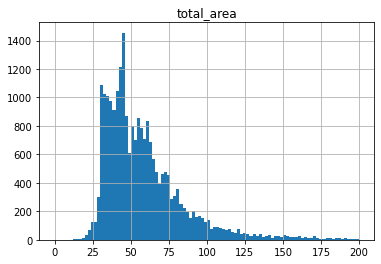

0.6536213939252808


count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [26]:
import matplotlib.pyplot as plt
data.hist('total_area',bins=100,range=(0,200))
plt.show()
print(data['total_area'].corr(data['last_price']))
data['total_area'].describe()

#### Жилая площадь
- Как показатель, жилая площадь - почти такой же показатель как и общая площадь (корреляция - 0,9)
- На гистограмме видны пики для типовых однокомнатных и двухкомнатных квартир

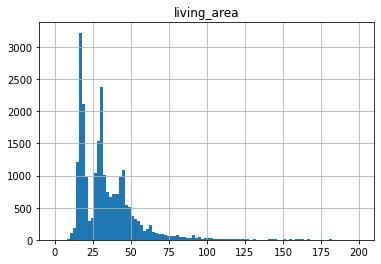

0.9098719746950379
0.5560540213128099


In [27]:
import matplotlib.pyplot as plt
data.hist('living_area',bins=100,range=(0,200))
plt.show()
print(data['living_area'].corr(data['total_area']))
print(data['living_area'].corr(data['last_price']))


#### Площадь кухни
- На гистограмме видны пики для стандартных значений в типовых квартирах (9 м2, 6 м2, 10 м2, 8м2)
- Есть некоторое количество предложений с нулевой площадью кухни - это квартиры студии

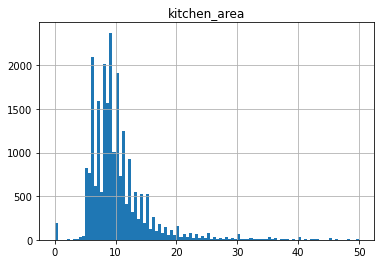

0.4518099250191707


9.00     1908
6.00     1298
10.00    1259
8.00     1108
7.00     1062
         ... 
14.65       1
13.35       1
11.64       1
10.89       1
16.74       1
Name: kitchen_area, Length: 965, dtype: int64

In [28]:
data.hist('kitchen_area',bins=100,range=(0,50))
plt.show()
print(data['kitchen_area'].corr(data['last_price']))
display(data['kitchen_area'].value_counts())

#### Цена объекта
- Квартиры представлены в широком ценовом диапазоне, с большей частью предложений в сегменте до 5 млн руб
- Минимальная цена - слишком низкая, скорее всего это выброс, цена указана с ошибкой в 10 раз. Поправим

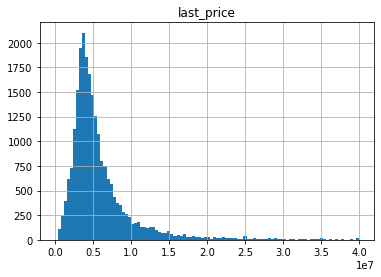

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64
763000000
12190


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,1,805.0,0.0,NaN,8,112.0,2,3,2019,последний


In [29]:
data.hist('last_price',bins=100, range=(0,4e7))
plt.show()
print(data['last_price'].describe())
print(data['last_price'].max())
print(data['last_price'].min())
display(data.loc[data['last_price']==data['last_price'].min()])
data.loc[data['last_price']==data['last_price'].min(),'last_price']=data.loc[data['last_price']==data['last_price'].min(),'last_price']*10



#### Количество комнат
- Абсолютное большинство предложений - для типовых 1,2,3,4 комнатных квартир

,last_price
rooms,
0,194
1,8004
2,7897
3,5779
4,1172
5,325
6,104
7,59
8,12


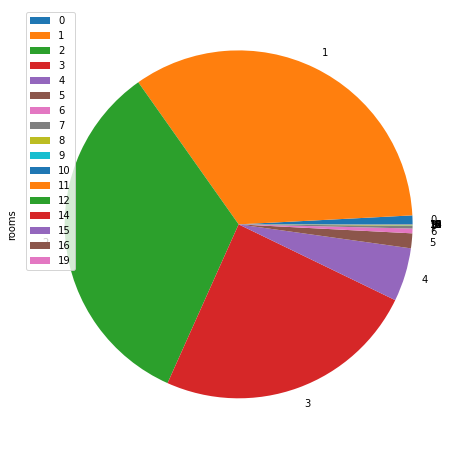

In [30]:
data_grouped_rooms=data.pivot_table(index='rooms',values='last_price',aggfunc='count')
display(data_grouped_rooms)
data_grouped_rooms.plot(kind='pie',y='last_price',figsize=(8,8),label='rooms')
plt.show()


#### Высота потолков
- Квартиры имеют стадартные высоты потолков, самый распространенный вариант - 2,65 м
- Квартиры с потолком выше стандартного (2,65) значительно дороже

count    23565.000000
mean         2.697066
std          0.219811
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64
2.65    9781
2.50    3522
2.60    1646
2.70    1579
3.00    1108
        ... 
4.90       1
5.20       1
3.58       1
2.89       1
4.65       1
Name: ceiling_height, Length: 166, dtype: int64


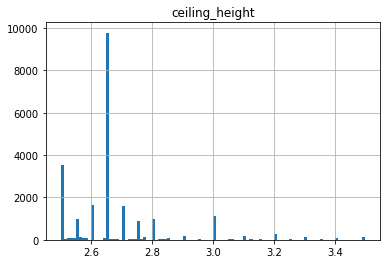

Медианная цена для квартир с высоким потолком: 98305.0
Медианная цена для квартир со стандартным потолком: 88051.5


In [31]:
data.hist('ceiling_height',bins=100, range=(2.5,3.5))
print(data['ceiling_height'].describe())
print(data['ceiling_height'].value_counts())
plt.show()
print('Медианная цена для квартир с высоким потолком:',data.query('ceiling_height>=2.65')['square_meter_price'].median())
print('Медианная цена для квартир со стандартным потолком:',data.query('ceiling_height<2.65')['square_meter_price'].median())

#### Этаж квартиры
- В целом этаж (если он не первый и не последний) квартиры не играет значительной роли в цене

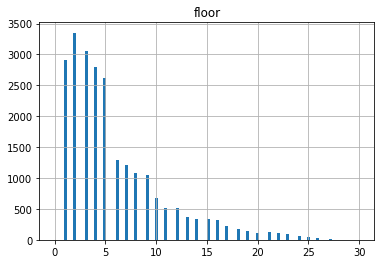

0.02684345711190198


In [32]:
data


data.hist('floor',bins=100, range=(0,30))
plt.show()
print(data['floor'].corr(data['last_price']))


#### Тип этажа квартиры («первый», «последний», «другой»);
- Квадратный метр на первом этаже значительно дешевле, чем на других этажах
- Квадратный метр по последнем также дешевле, но не так сильно по сравнению с первым
- Этаж квартиры не влияет на длительность продажи

,last_price
floor_type,
другой,17326
первый,2909
последний,3330


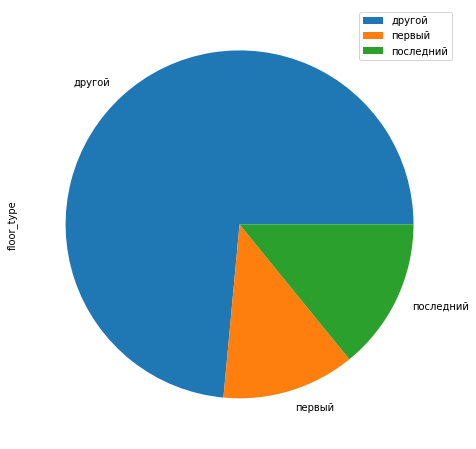

81250.0
98288.5
87763.0
95.0
95.0
95.0


In [33]:
data_grouped_floor=data.pivot_table(index='floor_type',values='last_price',aggfunc='count')
display(data_grouped_floor)
data_grouped_floor.plot(kind='pie',y='last_price',figsize=(8,8),label='floor_type')
plt.show()

print(data.query('floor_type=="первый"')['square_meter_price'].median())
print(data.query('floor_type=="другой"')['square_meter_price'].median())
print(data.query('floor_type=="последний"')['square_meter_price'].median())

print(data.query('floor_type=="первый"')['days_exposition'].median())
print(data.query('floor_type=="другой"')['days_exposition'].median())
print(data.query('floor_type=="последний"')['days_exposition'].median())



<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличная визуализация! Полученные данные соответствуют реалиям
</div>

#### Общее количество этажей в доме;
- На рынке представлены квартиры в домах самой разнообразной этажности, больше всего в старых 5 и 9 этажных
- Общее число этажей в доме почти не связано с ценой

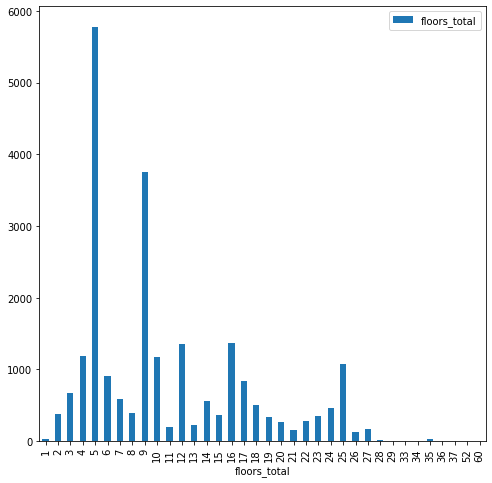

0.1484232840812346


In [34]:
data_grouped_floors=data.pivot_table(index='floors_total',values='last_price',aggfunc='count')
#display(data_grouped_floors)
data_grouped_floors.plot(kind='bar',y='last_price',figsize=(8,8),label='floors_total')
plt.show()
print(data['floors_total'].corr(data['square_meter_price']))

#### Расстояние до центра города в километрах;
- Напомним что расстояние указано до центра **Санкт-Петербурга** и в данных много пропусков
- На гистограмме есть характерные пропуски - результат округления на более ранних шагах
- Расстоянияе до центра города не коррелирует ни с ценой, ни с временем продажи

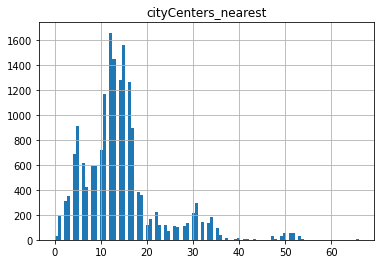

-0.20608548535558008
-0.05048109703666805


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2.0,755.0,95,120370.0,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,0.0,NaN,81,82921.0,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2.0,574.0,558,92786.0,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,2,84.0,3.0,234.0,424,408176.0,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1.0,48.0,121,100000.0,1,6,2018,другой


In [35]:
data.hist('cityCenters_nearest',bins=100)
plt.show()
print(data['cityCenters_nearest'].corr(data['last_price']))
print(data['cityCenters_nearest'].corr(data['days_exposition']))
display(data.head())

#### Расстояние до ближайшего аэропорта;
- Напомним, что в данных много пропусков, данные есть почти только для Спб
- Расстояние до ближайшего аэропорта не коррелирует ни с ценой, ни с временем продажи

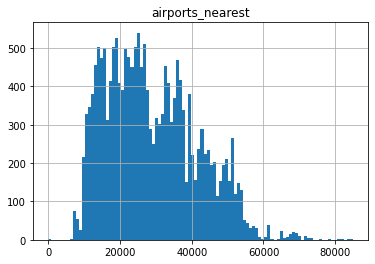

-0.026563494656763477
-0.016038896815483546


In [36]:
data.hist('airports_nearest',bins=100)
plt.show()
print(data['airports_nearest'].corr(data['last_price']))
print(data['airports_nearest'].corr(data['days_exposition']))

#### Расстояние до ближайшего парка;
- Напомним, что в данных много пропусков, данные есть почти только для Спб
- Расстояние до ближайшего парка не коррелирует ни с ценой, ни с временем продажи
- В абсолютном большинстве случаем, в пределах 1 км от квартиры есть парк

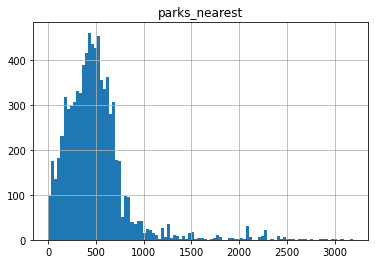

-0.016527811451929268
0.02118029585005215


In [37]:
data.hist('parks_nearest',bins=100)
plt.show()
print(data['parks_nearest'].corr(data['last_price']))
print(data['parks_nearest'].corr(data['days_exposition']))

#### День и месяц публикации объявления;
- Большинство объявлений публикуется на рабочей неделе, больше всего в четверг
- Февраль, март, апрель и ноябрь - самые популярные месяцы по числу новых объявлений

,last_price
exposition_weekday,
0,3596
1,4163
2,3948
3,4276
4,3980
5,1919
6,1683


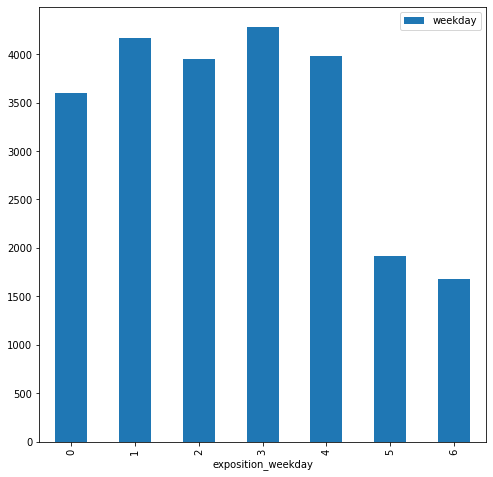

,last_price
exposition_month,
1,1487
2,2636
3,2575
4,2356
5,1261
6,1747
7,1686
8,1739
9,1972


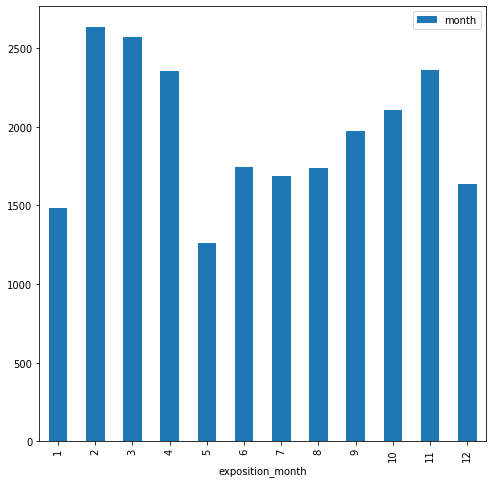

In [38]:
data_grouped_weekday=data.pivot_table(index='exposition_weekday',values='last_price',aggfunc='count')
display(data_grouped_weekday)
data_grouped_weekday.plot(kind='bar',y='last_price',figsize=(8,8),label='weekday')
plt.show()

data_grouped_month=data.pivot_table(index='exposition_month',values='last_price',aggfunc='count')
display(data_grouped_month)
data_grouped_month.plot(kind='bar',y='last_price',figsize=(8,8),label='month')
plt.show()

#### Как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление

1. Постройте гистограмму.Посчитайте среднее и медиану. В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- На графике виден огромный пик для времени экспозиции = 95 дней, вряд-ли так много квартир продалось ровно за 95 дней. Этот пик связан с внутренними ограничениями Яндекс недвижимости, например платное объявление автоматически снимается если вовремя не внести оплату, а бесплатные просто висят не более 95 дней (или 45 или 60, где видны другие пики). Также это могут быть объявления продавцов, которые продали квартиру, но забыли снять объявление.
- Посмотрим на медиану, если исключить пик в 95 дней - значение меняется с 95 на 96, картина остается такой же
- Среднее отличается от медианы почти в два раза - в данных есть квартиры, которые продавались по 1,5 года и более, они сильно смещают среднее
- Из имеющихся данных нелья точно определить за сколько именно дней квартира была продана, укажем это в окончательном выводе.
- Больше половины всех квартир "висело" 95 дней и меньше, хотя из количества дней на экспозиции нельзя точно установить, была ли квартира действительно продана. Примем что время продажи в 95 дней и менее считается - "быстрым", а время продажи более 95 дней  - "медленным"

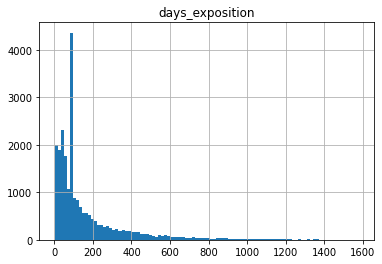

95.0
169.2036919159771
95      3234
45       879
60       538
7        234
30       208
        ... 
1112       1
1080       1
1064       1
1032       1
1391       1
Name: days_exposition, Length: 1139, dtype: int64


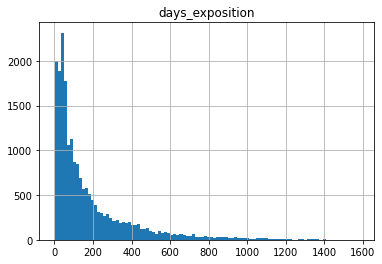

96.0
13386
10179


In [39]:
data.hist('days_exposition',bins=100)
plt.show()
print(data['days_exposition'].median())
print(data['days_exposition'].mean())
print(data['days_exposition'].value_counts())

data.query('days_exposition!=95').hist('days_exposition',bins=100)
plt.show()
print(data.query('days_exposition!=95')['days_exposition'].median())

print(data.query('days_exposition<=95')['days_exposition'].value_counts().sum())
print(data.query('days_exposition>95')['days_exposition'].value_counts().sum())

#### Определим факторы оказывающие наибольшее влияние на общую (полную) стоимость объекта  Построим графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных используем сводные таблицы
- общей площади;
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год);

##### Зависимость цены от общей площади
- Площадь - один из важнейших факторов, чем больше квартира, тем она дороже
- Для дорогих квартир (более 15000000) квартир корреляция площади и цены становится слабеее

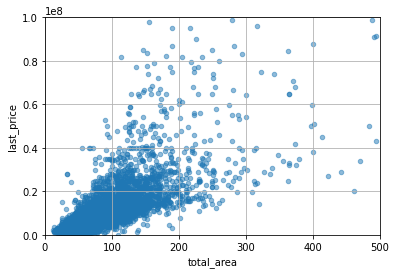

0.7435080498470464
0.5075263835699252


In [40]:
data.plot(x='total_area', y='last_price', style='o',xlim=(0,500),ylim=(0,10e7),alpha=0.5,kind='scatter',grid=True)
plt.show()

print(data.query('last_price<=15000000')['total_area'].corr(data['last_price']))
print(data.query('last_price>15000000')['total_area'].corr(data['last_price']))



##### Зависимость цены от жилой площади
- Почти такой же параметр как и общая площадь, чем больше площадь, тем дороже, однако корреляция слабее, чем для общей площади

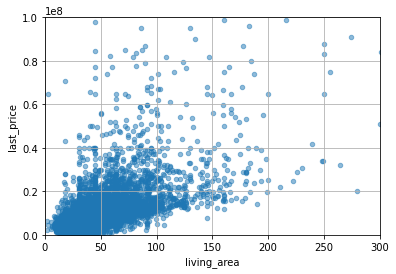

0.9098719746950379
0.5560541164173345


In [41]:
data.plot(x='living_area', y='last_price', style='o',xlim=(0,300),ylim=(0,10e7),alpha=0.5,kind='scatter',grid=True)
plt.show()
print(data['total_area'].corr(data['living_area']))
print(data['living_area'].corr(data['last_price']))



##### Зависимость цены от площади кухни
- Чем больше кухня, тем квартира дороже -  есть положительная корреляция
- Однако для маленьких кухонь (менее 8м2) такая зависимость гораздно слабее

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2.0,755.0,95,120370.0,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,0.0,NaN,81,82921.0,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2.0,574.0,558,92786.0,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,2,84.0,3.0,234.0,424,408176.0,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1.0,48.0,121,100000.0,1,6,2018,другой


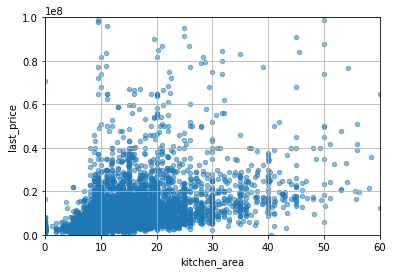

0.4518122867528669
0.20859178995331557
0.4345742832501734


In [42]:
display(data.head())
data.plot(x='kitchen_area', y='last_price', style='o-',xlim=(0,60),ylim=(0,10e7),alpha=0.5,kind='scatter',grid=True)
plt.show()
print(data['kitchen_area'].corr(data['last_price']))

print(data.query('kitchen_area<=8')['kitchen_area'].corr(data['last_price']))
print(data.query('kitchen_area>8')['kitchen_area'].corr(data['last_price']))


##### Зависимость цены от количества комнат
- В общем, чем больше комнат, тем выше цена
- Для многокомнатных квартир цена за м2 снижается от 1-комнатной до 3-комнатной, затем, начиная с 4-комнатной опять растет

,median,median_m2,count,count_m2
rooms,,,,
0,2700000,105327.0,194,194
1,3600000,100000.0,8004,8004
2,4768714,92807.0,7897,7897
3,6200000,88971.0,5779,5779
4,9000000,92540.0,1172,1172
5,14000000,96552.0,325,325
6,19000000,99391.5,104,104
7,24900000,108827.0,59,59
8,23095000,106760.0,12,12


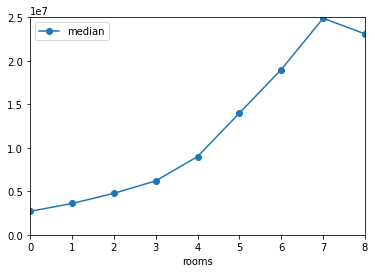

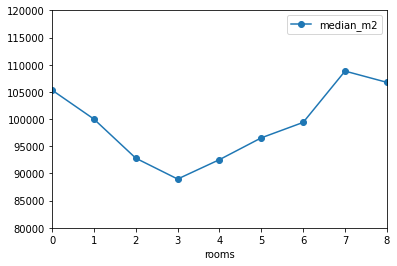

In [43]:
data_grouped_rooms2=data.pivot_table(index='rooms',values=['last_price','square_meter_price'],aggfunc=['median','count'])
data_grouped_rooms2.columns = ['median','median_m2', 'count','count_m2']
display(data_grouped_rooms2)
data_grouped_rooms2.plot(y='median',xlim=(0,8),ylim=(0,25e6), style='o-')
data_grouped_rooms2.plot(y='median_m2',xlim=(0,8),ylim=(80000,120000), style='o-')
plt.show()
#data_grouped_rooms.plot(kind='pie',y='last_price',figsize=(8,8),label='rooms')
#plt.show()

##### Зависимость цены от типа этажа, на котором расположена квартира (первый, последний, другой);
- Квартиры не на первом и не на последнем этаже дороже
- Квартиры на первом этаже, в среднем на 25% дешевле квартир на других этажах
- Квартиры на последнем этаже, в среднем на 12% дешевле квартир на других этажах

,last_price
floor_type,
другой,4848500
первый,3900000
последний,4300000


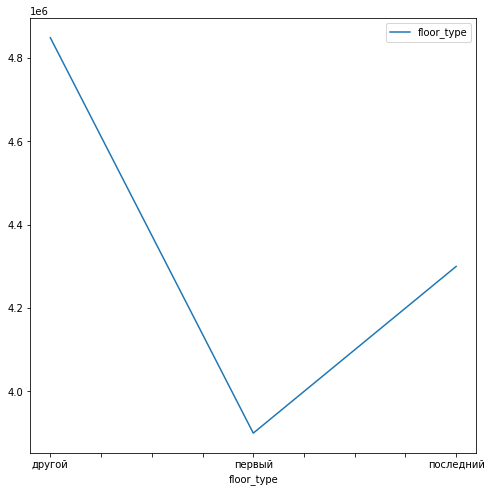

last_price    1.243205
dtype: float64

last_price    1.127558
dtype: float64

In [44]:
data_grouped_floor2=data.pivot_table(index='floor_type',values='last_price',aggfunc='median')
display(data_grouped_floor2)

data_grouped_floor2.plot(y='last_price',figsize=(8,8),label='floor_type')
plt.show()

display(data_grouped_floor2.loc['другой']/data_grouped_floor2.loc['первый'])
display(data_grouped_floor2.loc['другой']/data_grouped_floor2.loc['последний'])


##### Зависимость цены от даты размещения (день недели, месяц, год);
- Цены на недвижимости падали с 2014 по 2016, затем резко начали расти
- После 2016 цены за м2 резко выросли, а общая площадь продаваемых квартир в среднем упала с 75м2 до 55м2. За те же деньги стало возможным купить только значительно меньшую квартиру
- В среднем, предложения выставленные к конце недели дешевле прочих
- В апреле, когда рынок активнее всего наблюдаются самые высокие цены, в июне напротив, меньше предложений и цены ниже

,last_price,square_meter_price
exposition_weekday,,
0,4650000,94720.0
1,4720000,95568.0
2,4700000,95474.0
3,4650000,95133.0
4,4550000,94580.0
5,4550000,93548.0
6,4530000,94595.0


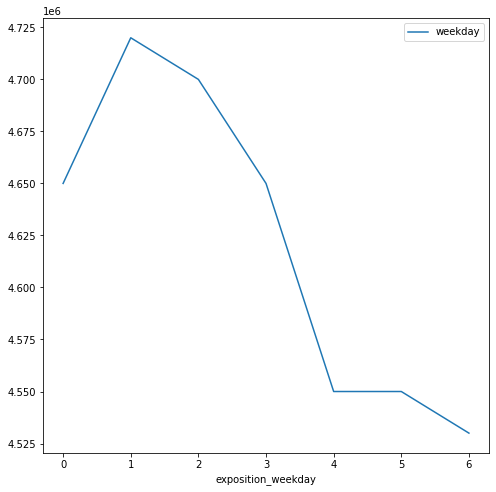

In [45]:
data_grouped_weekday2=data.pivot_table(index='exposition_weekday',values=['last_price','square_meter_price'],aggfunc='median')
display(data_grouped_weekday2)
data_grouped_weekday2.plot(y='last_price',figsize=(8,8),label='weekday')
plt.show()

,last_price,square_meter_price
exposition_month,,
1,4600000,95181.0
2,4650000,95000.0
3,4650000,95233.0
4,4800000,96544.0
5,4500000,92697.0
6,4400000,92857.0
7,4650000,95006.0
8,4570000,96053.0
9,4700000,95623.5


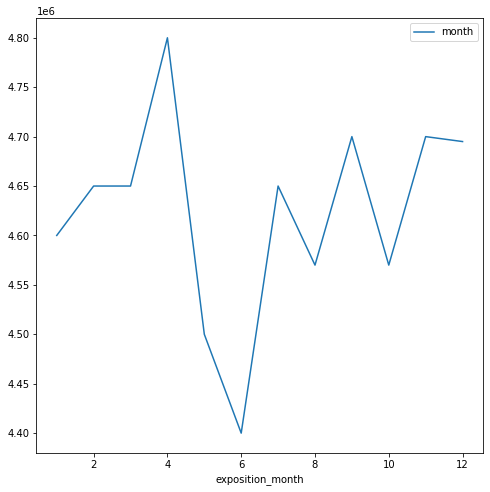

In [46]:
data_grouped_month2=data.pivot_table(index='exposition_month',values=['last_price','square_meter_price'],aggfunc='median')
display(data_grouped_month2)
data_grouped_month2.plot(y='last_price',figsize=(8,8),label='month')
plt.show()

,last_price,square_meter_price,total_area
exposition_year,,,
2014,7640000,106902.0,76.18
2015,5300500,93364.5,60.00
2016,4530000,91743.0,53.10
2017,4500000,92570.0,52.00
2018,4550000,95696.5,50.50
2019,5050000,103199.0,52.00


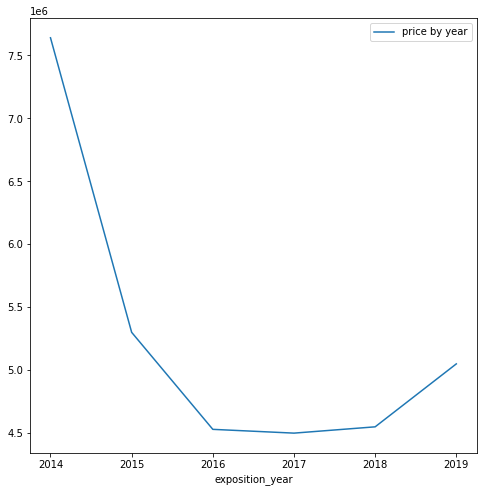

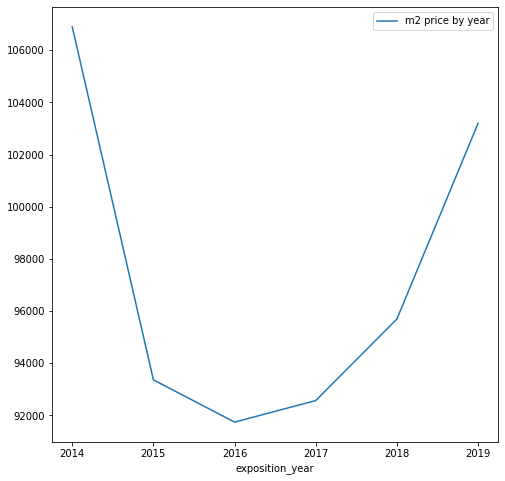

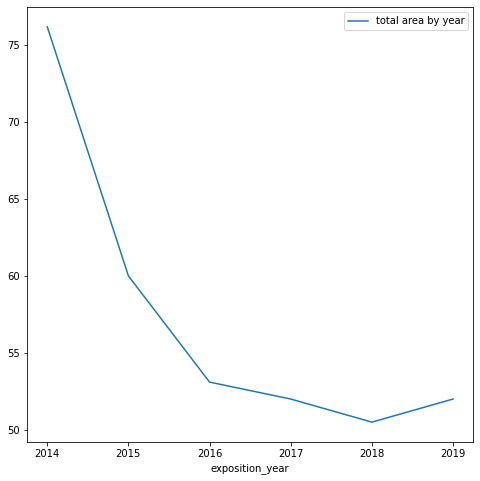

In [47]:
data_grouped_year2=data.pivot_table(index='exposition_year',values=['last_price','square_meter_price','total_area'],aggfunc='median')
display(data_grouped_year2)
data_grouped_year2.plot(y='last_price',figsize=(8,8),label='price by year')
plt.show()
data_grouped_year2.plot(y='square_meter_price',figsize=(8,8),label='m2 price by year')
plt.show()
data_grouped_year2.plot(y='total_area',figsize=(8,8),label='total area by year')
plt.show()

#### Определим среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`

In [48]:
ten=(data['locality_name'].value_counts().head(10))
data_ten=data.query('locality_name in @ten.index')
display(ten)
#display(data_ten)
data_ten_pivot=data_ten.pivot_table(index='locality_name',values='square_meter_price',aggfunc='median')\
    .sort_values(by='square_meter_price',ascending=False)
display(data_ten_pivot)
print('Средняя цена квадратного метра в 10 населенных пунктах с наибольшим числом объявлений:',\
      round(data_ten_pivot['square_meter_price'].mean()),'руб')
print()
print('Самый дорогой м2 в:')
display(data_ten_pivot.loc[data_ten_pivot['square_meter_price']==data_ten_pivot['square_meter_price'].max()])

print('Самый дешевый м2 в:')
display(data_ten_pivot.loc[data_ten_pivot['square_meter_price']==data_ten_pivot['square_meter_price'].min()])

Санкт-Петербург      15651
поселок Мурино         586
деревня Кудрово        470
поселок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
Выборг                 237
Name: locality_name, dtype: int64

,square_meter_price
locality_name,
Санкт-Петербург,104775.0
Пушкин,100000.0
деревня Кудрово,95555.0
поселок Парголово,91643.0
поселок Мурино,86250.5
поселок Шушары,76829.0
Колпино,74723.5
Гатчина,67797.0
Всеволожск,65789.0


Средняя цена квадратного метра в 10 населенных пунктах с наибольшим числом объявлений: 82152 руб

Самый дорогой м2 в:


,square_meter_price
locality_name,
Санкт-Петербург,104775.0


Самый дешевый м2 в:


,square_meter_price
locality_name,
Выборг,58158.0


#### Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра. Посмотрим, как стоимость объектов зависит от расстояния до центра города."

- Цена максимальна в самом центре города и плавно убывает с удалением от него
- Самые дорогие квартиры - в радиусе 5 км от центра - соотвествует историческому центру города
- Все что далее, более поздняя, советская застройка - стоит знаительно меньше

,square_meter_price
cityCenters_nearest,
0.0,245833.518519
1.0,177005.395833
2.0,157848.983871
3.0,121507.821839
4.0,133282.873547
5.0,140453.955191
6.0,151012.189320
7.0,156176.866667
8.0,125649.730640


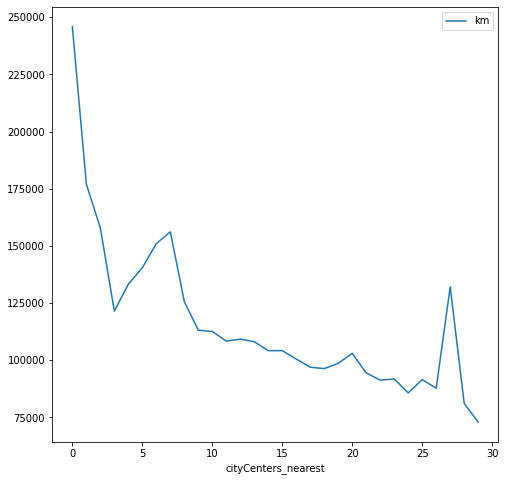

In [49]:
data_spb=data.query('locality_name == "Санкт-Петербург"')
#display(data_spb)
data_spb_km=data_spb.pivot_table(index='cityCenters_nearest',values='square_meter_price',aggfunc='mean')
display(data_spb_km)
data_spb_km.plot(y='square_meter_price',figsize=(8,8),label='km')
plt.show()

### Общий вывод


В данном исследовании был проведен подробный анализ рынка недвижимости Санкт-Петербурга и области по данным сервиса Яндекс.Недвижимость. При анализе было выполнено следующее:

- Исходные данные проверены и очищены от пропусков, выбросов, артефактов, некорректных значений. Устранены дубликаты, данные переведены в корректные типы
- Были добавлены дополнительные столбцы, необходимые для анализа
    - цена одного квадратного метра;
    - день недели публикации объявления;
    - месяц публикации объявления;
    - год публикации объявления;
    - тип этажа квартиры («первый», «последний», «другой»);
    - расстояние до центра города в километрах;
- Изучены следующие параметры объектов, построены гистограммы: 
    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена объекта;
    - количество комнат;
    - высота потолков;
    - этаж квартиры;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего аэропорта;
    - расстояние до ближайшего парка;
    - день и месяц публикации объявления.
- Оценена стоимость 1м2 в 10 крупнеших населенных пунктах, найдены минимум и максимум
- Рассмотрены важнейшие факторы, влияющие на стоимость квартиры

#### Выводы

1. Исходные данные имеют значительно количество пропусков, ошибок, выбросов и требуют предообработки перед анализом
2. Основной показатель, влияющий на цену квартиры - ее цена
3. Квартиры на первых и последних этажах продаются дешевле, чем квартиры на других этажах
4. Отсутствуют данные, позволяющие определить за какой срок квартира была продана, это искажает анализ связанных характеристик
5. Абсолютное большинство предложений на рынке - для 1-3 комнатных квартир
6. Квартиры с потолками более 2,65 м дороже прочих
7. В Санкт-Петербурге самые дорогие квартиры в центре города (до 5 км от центра). Квартиры дальше можно купить значительно дешевле
8. Цены на квартиры растут с 2016 года
9. Большая часть новых объявлений выкладывается в рабочие дни
10. Такие параметры как расстояние до аэропорта, ближайших парков и прудов не влияют на цену квартиры
11. Больше половины квартир продается за 95 дней и менее